In [5]:
# import all needed libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler

In [6]:
# load the processed dataset
data = pd.read_csv('data_processed_label_encoded.csv')

In [7]:
data.shape

(7040, 25)

In [31]:
# label_name = ['CO2_EM_PC']
# feature_names = [ 
# 'ALT_NUCL_EN_PERC',
# 'AIR_TRANS_FREIGHT',
# 'COMB_REN_WASTE_PERC',
# 'CEREAL_YIELD',
# 'ELEC_PROD_COAL_PERC',
# 'ELEC_PROD_HYDRO_PERC',
# 'ELEC_PROD_NAT_GAS_PERC',
# 'ELEC_PROD_NUCL_PERC',
# 'ELEC_PROD_OIL_PERC',
# 'ELEC_PROD_RENW_SRC_PERC',
# 'EN_USE_PC',
# 'FOSSIL_FUEL_EN_CONS_PERC',
# 'FUEL_IMPORT_PERC',
# 'GDP_GROWTH_PERC',
# 'GDP_PC',
# 'POP_GROWTH_PERC',
# 'POP_URBAN_AGG',
# 'URBAN_POP_TOTAL',
# 'URBAN_POP_GROWTH',
# 'METHANE_EM',
# 'NO2_EM'
# ]
# len(feature_names)

21

In [32]:
# convert into nympy arrays (required for scikit-learn models)
# features = np.array(data[feature_names])
# labels =  np.array(data[label_name])

In [8]:
X = data.drop('CO2_EM_PC', axis=1)
y = data['CO2_EM_PC']

In [29]:
# splitting of traing testing set into X and y

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [30]:
scaler =StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Linear Regression

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.intercept_

4.683442041468609

In [33]:
model.coef_

array([ 2.80980523e-01, -3.31752353e-01, -5.21775176e-02, -8.00497886e-01,
        4.16870505e-01,  5.96584795e-01,  1.27663706e+00, -1.16764280e+00,
       -1.32174863e+00, -9.64940562e-01, -3.71204120e-01, -1.38850907e+00,
       -4.17247058e-01,  4.16258633e+00,  1.71417480e+00, -7.59737179e-04,
       -1.11849402e-02, -6.18471853e-02, -2.45845154e-01, -1.02078133e-01,
        1.69595654e-01,  5.01297045e-02, -1.85779898e-01,  8.72509512e-01])

In [34]:
y_pred = model.predict(X_test)
y_pred

array([ 3.38426293, 23.94935321, 10.62699117, ...,  1.35790406,
        8.67727694, -0.24360457])

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.175468538597583

In [36]:
r2_score(y_test, y_pred)

0.8352645586452482

In [38]:
frames = [y_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T

In [39]:
lin_pred = result_pred.rename(columns={0: 'pred_values',1:'real_values'})
lin_pred['pred_values'] = lin_pred['pred_values'].map(lambda x: round(x,2))

lin_pred

,pred_values,real_values
0,3.38,1.480830
1,23.95,26.146800
2,10.63,11.951632
3,-0.00,0.138630
4,4.59,4.377988
...,...,...
2811,0.31,0.522618
2812,20.55,27.431434
2813,1.36,1.232285
2814,8.68,9.340093


In [40]:
lin_pred['diff'] = abs(lin_pred['pred_values'] - lin_pred['real_values'])

print('mean diff: ', (abs(lin_pred['diff']).mean()))

mean diff:  1.2499109116014055


In [41]:
lin_pred.head(10)

,pred_values,real_values,diff
0,3.38,1.480830,1.899170
1,23.95,26.146800,2.196800
2,10.63,11.951632,1.321632
3,-0.00,0.138630,0.138630
4,4.59,4.377988,0.212012
5,1.39,0.895302,0.494698
6,0.11,0.326343,0.216343
7,7.41,7.627070,0.217070
8,3.27,2.184579,1.085421
9,0.77,0.757221,0.012779


<AxesSubplot:xlabel='CO2_EM_PC', ylabel='Count'>

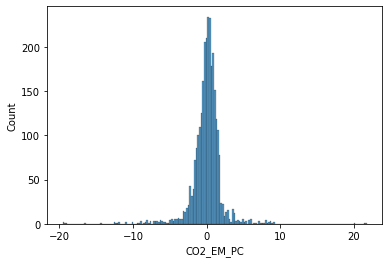

In [42]:
sns.histplot(y_pred-y_test)

Text(0, 0.5, 'y_pred')

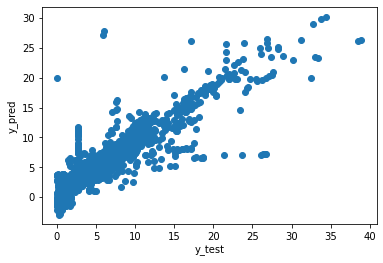

In [43]:
plt.scatter( y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

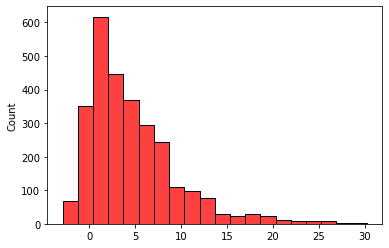

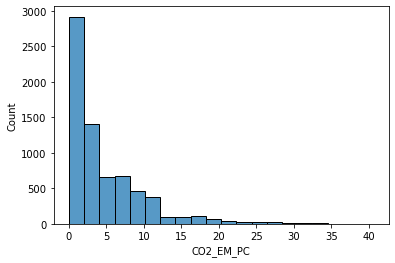

In [45]:
sns.histplot(y_pred, bins=20,color='red')
plt.show()
sns.histplot(data['CO2_EM_PC'], bins=20)
plt.show()


In [ ]:
#DECISION TREE REGRESSION

In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state = 42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [47]:
dtr_pred = model.predict(X_test)
dtr_pred

array([ 1.6674123 , 24.30514892,  6.08224227, ...,  1.25614581,
        8.83664294,  0.0800615 ])

In [48]:
np.sqrt(mean_squared_error(y_test,dtr_pred ))

1.0766627592488185

In [49]:
r2_score(y_test, dtr_pred)

0.959650253290528

In [50]:
frames = [dtr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,1.667412,1.480830
1,24.305149,26.146800
2,6.082242,11.951632
3,0.135983,0.138630
4,4.911682,4.377988


In [51]:
dtr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
dtr_pred['pred_values'] = (dtr_pred['pred_values'].map(lambda x: round(x,2)))

dtr_pred['diff'] = abs(dtr_pred['real_values'] -dtr_pred['pred_values'])


print('mean diff: ', abs(dtr_pred['diff']).mean())


mean diff:  0.3782295130589393


In [52]:
dtr_pred.head(10)

,pred_values,real_values,diff
0,1.67,1.480830,0.189170
1,24.31,26.146800,1.836800
2,6.08,11.951632,5.871632
3,0.14,0.138630,0.001370
4,4.91,4.377988,0.532012
5,0.84,0.895302,0.055302
6,0.30,0.326343,0.026343
7,7.64,7.627070,0.012930
8,2.17,2.184579,0.014579
9,0.60,0.757221,0.157221


In [ ]:
#Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [56]:
y_rf_pred = rf_model.predict(X_test)
y_rf_pred

array([ 1.76028859, 24.61124541, 10.82673077, ...,  1.22732187,
        8.95532547,  0.07808335])

In [60]:
print('RMSE: {:0.4f}'.format(np.sqrt(mean_squared_error(y_test,y_rf_pred))))
print('MAE: {:0.4f}'.format(mean_absolute_error(y_test,y_rf_pred)))
print('R2_score: {:0.4f}'.format(r2_score(y_test,y_rf_pred)))
print('MSE: {:0.4f}'.format(mean_squared_error(y_test, y_rf_pred)))

RMSE: 0.6859
MAE: 0.2719
R2_score: 0.9836
MSE: 0.4704


In [61]:
frames = [y_rf_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,1.760289,1.480830
1,24.611245,26.146800
2,10.826731,11.951632
3,0.142847,0.138630
4,4.883570,4.377988


In [62]:
y_rf_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_rf_pred['pred_values'] = (y_rf_pred['pred_values'].map(lambda x: round(x,2)))

y_rf_pred['diff'] = abs(y_rf_pred['real_values'] -y_rf_pred['pred_values'])


print('mean diff: ', abs(y_rf_pred['diff']).mean())

mean diff:  0.2720411226684882


In [63]:
y_rf_pred.head(10)

,pred_values,real_values,diff
0,1.76,1.480830,0.279170
1,24.61,26.146800,1.536800
2,10.83,11.951632,1.121632
3,0.14,0.138630,0.001370
4,4.88,4.377988,0.502012
5,0.85,0.895302,0.045302
6,0.36,0.326343,0.033657
7,7.76,7.627070,0.132930
8,2.22,2.184579,0.035421
9,0.63,0.757221,0.127221


In [ ]:
#SIMPLE VECTOR MACHINE

In [64]:
from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(X_train, y_train)
y_svr_pred = model.predict(X_test)
y_svr_pred

/opt/homebrew/Caskroom/miniforge/base/envs/projectenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ 2.3127201 , 26.24371207, 11.07264526, ...,  1.4573992 ,
        8.04667763,  0.0363214 ])

In [65]:
np.sqrt(mean_squared_error(y_svr_pred,y_test))

2.28395995779139

In [66]:
r2_score(y_svr_pred,y_test)

0.804257361146849

In [67]:
frames = [y_svr_pred, y_test.values]
result_pred = pd.DataFrame(data=frames)
result_pred = result_pred.T
result_pred.head()

,0,1
0,2.312720,1.480830
1,26.243712,26.146800
2,11.072645,11.951632
3,-0.005774,0.138630
4,4.124686,4.377988


In [68]:
y_svr_pred = result_pred.rename(columns={0: 'pred_values', 1:'real_values'})
y_svr_pred['pred_values'] = (y_svr_pred['pred_values'].map(lambda x: round(x,2)))

y_svr_pred['diff'] = abs(y_svr_pred['real_values'] -y_svr_pred['pred_values'])


print('mean diff: ', abs(y_svr_pred['diff']).mean())

mean diff:  0.9358572734532774


In [69]:
y_svr_pred.head(10)

,pred_values,real_values,diff
0,2.31,1.480830,0.829170
1,26.24,26.146800,0.093200
2,11.07,11.951632,0.881632
3,-0.01,0.138630,0.148630
4,4.12,4.377988,0.257988
5,1.21,0.895302,0.314698
6,0.39,0.326343,0.063657
7,7.53,7.627070,0.097070
8,2.58,2.184579,0.395421
9,0.50,0.757221,0.257221


In [71]:
models =['LinReg','DT', 'RF',"SVR"]

frame = pd.DataFrame(columns={'models':[],'rmse_train':[], 'mae_train':[],'r2_train':[] ,'rmse_test':[], 'mae_test':[],'r2_test':[]})



for i in range(len(models)):
    if models[i] == 'LinReg':
        model = LinearRegression()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Linear Regression', rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='DT':
        model = DecisionTreeRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Decision Tree Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    elif models[i] =='RF':
        model = RandomForestRegressor()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
       
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Random Forest Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]
        
    else :
        models[i] =='SVM'
        model = LinearSVR()
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
        mae_train = mean_absolute_error(y_train,pred_train)
        r2_train = r2_score(y_train,pred_train)
        
        pred_test = model.predict(X_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
        mae_test = mean_absolute_error(y_test,pred_test)
        r2_test = r2_score(y_test,pred_test)
        frame.loc[frame.shape[0]] = ['Simple Vector Regression',rmse_train, mae_train,r2_train,rmse_test,mae_test,r2_test]

/opt/homebrew/Caskroom/miniforge/base/envs/projectenv/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
frame

,models,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test
0,Linear Regression,2.248606e+00,1.274278e+00,0.825057,2.175469,1.249916,0.835265
1,Decision Tree Regression,7.307584e-17,6.202951e-18,1.000000,1.074164,0.378154,0.959837
2,Random Forest Regression,2.745645e-01,9.923602e-02,0.997392,0.688010,0.272855,0.983523
3,Simple Vector Regression,2.483296e+00,9.905906e-01,0.786634,2.283489,0.935967,0.818499
